<a href="https://colab.research.google.com/github/svet02-ai/LogRegression_Python/blob/main/LogeReg_CreditApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/data.csv')
data.head()

,cliente,oficina,ingresos,viviendatipo,viviendavalor,estadocivil,lineasdevale,montosdelineas,dependientes,fechanacimiento,default
0,1000181,10,11099.0,propia,700000.0,soltero,1,42000.0,2,20151007,1
1,1000276,10,31000.0,familiar,250000.0,casado,1,55000.0,1,19701019,0
2,1000329,10,46000.0,familiar,200000.0,casado,0,0.0,2,19730920,0
3,1000885,10,4862.0,propia,350000.0,casado,0,0.0,2,19800914,1
4,1000903,10,22000.0,familiar,55000.0,casado,2,91476.0,3,19761010,1


In [ ]:
data.shape

(8144, 11)

In [ ]:
data.dtypes

cliente              int64
oficina              int64
ingresos           float64
viviendatipo        object
viviendavalor      float64
estadocivil         object
lineasdevale         int64
montosdelineas     float64
dependientes         int64
fechanacimiento      int64
default              int64
dtype: object

In [ ]:
data.describe()

,cliente,oficina,ingresos,viviendavalor,lineasdevale,montosdelineas,dependientes,fechanacimiento,default
count,8.144000e+03,8144.000000,8144.000000,8.144000e+03,8144.000000,8.144000e+03,8144.000000,8.144000e+03,8144.000000
mean,1.890547e+06,19.683325,18883.502656,4.496725e+05,2.000491,1.632950e+05,2.834971,1.976787e+07,0.252701
std,1.280027e+06,13.255165,18649.955684,1.713811e+06,2.011938,1.081992e+06,34.987077,1.005748e+05,0.434588
min,2.001400e+05,2.000000,-100.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.900083e+07,0.000000
25%,6.217558e+05,6.000000,6000.000000,2.500000e+05,0.000000,0.000000e+00,1.000000,1.969093e+07,0.000000
50%,2.006964e+06,20.000000,17000.000000,3.000000e+05,2.000000,7.709850e+04,2.000000,1.977053e+07,0.000000
75%,3.208488e+06,32.000000,26600.000000,5.000000e+05,3.000000,1.987739e+05,2.000000,1.985012e+07,1.000000
max,5.300031e+06,59.000000,548000.000000,1.502000e+08,14.000000,9.221000e+07,1000.000000,2.020013e+07,1.000000


array([[<Axes: title={'center': 'ingresos'}>]], dtype=object)

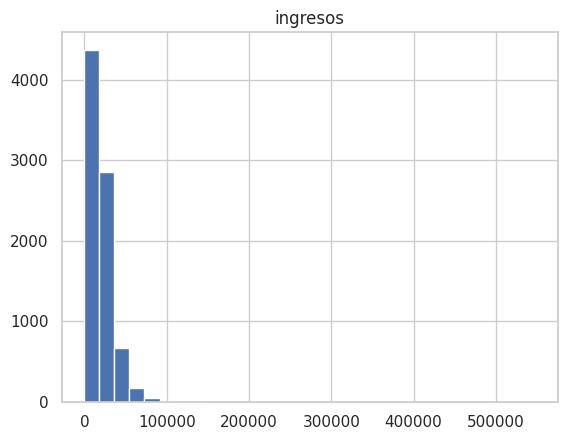

In [ ]:
data.hist(column='ingresos', bins=30)

In [ ]:
z = np.abs(stats.zscore(data['ingresos']))
threshold = 3
big_outliers = data[z>threshold]
print(big_outliers['ingresos'])

127     109698.0
160      76156.0
169     108000.0
233      97280.0
264      93920.0
          ...   
7620     75224.0
7659    297000.0
7723    170600.0
7993    109000.0
7997    100000.0
Name: ingresos, Length: 77, dtype: float64


In [ ]:
data = data.drop(big_outliers.index)

In [ ]:
count_zeros = (data['ingresos'] <= 0).sum()
print(count_zeros)

1787


In [ ]:
data.isnull().mean()*100

cliente            0.000000
oficina            0.000000
ingresos           0.000000
viviendatipo       3.346969
viviendavalor      0.000000
estadocivil        0.000000
lineasdevale       0.000000
montosdelineas     0.000000
dependientes       0.000000
fechanacimiento    0.000000
default            0.000000
dtype: float64

In [ ]:
data['viviendatipo'].mode()

0    familiar
Name: viviendatipo, dtype: object

In [ ]:
data['viviendatipo']=data['viviendatipo'].fillna('familiar')

In [ ]:
data['default'].value_counts()

default
0    6033
1    2034
Name: count, dtype: int64

<ipython-input-15-b724b0f18d34>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=data, palette='hls')


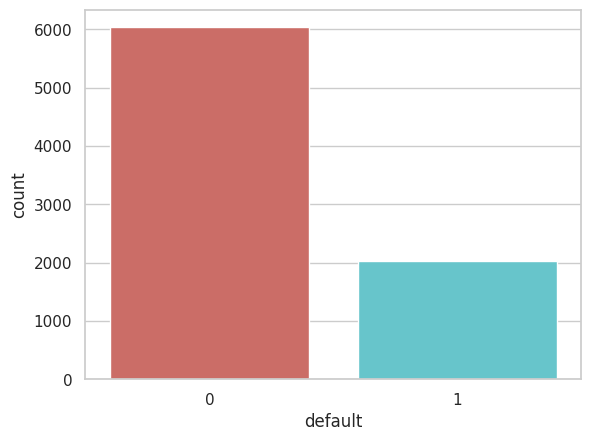

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(x='default', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
data['Year'] = data['fechanacimiento'].astype(str).str[:4]
data['Year'] = pd.to_numeric(data['Year'])
current_year = 2024
data['Age'] = current_year -  data['Year']
data = data.drop('Year', axis=1)
print(data)

      cliente  oficina  ingresos viviendatipo  viviendavalor estadocivil  \
0     1000181       10   11099.0       propia       700000.0     soltero   
1     1000276       10   31000.0     familiar       250000.0      casado   
2     1000329       10   46000.0     familiar       200000.0      casado   
3     1000885       10    4862.0       propia       350000.0      casado   
4     1000903       10   22000.0     familiar        55000.0      casado   
...       ...      ...       ...          ...            ...         ...   
8139   823932        8   24000.0     familiar       580000.0      casado   
8140   824009        8   18400.0     familiar       800000.0     soltero   
8141   824025        8   21176.0     familiar       800000.0      casado   
8142   824043        8   10404.0     familiar       800000.0     soltero   
8143   824072        8   23862.0     familiar      1500000.0      casado   

      lineasdevale  montosdelineas  dependientes  fechanacimiento  default  \
0        

In [ ]:
data.groupby('default')[['ingresos', 'viviendavalor', 'lineasdevale', 'montosdelineas', 'dependientes', 'Age']].mean()

,ingresos,viviendavalor,lineasdevale,montosdelineas,dependientes,Age
default,,,,,,
0,17756.976274,465785.318079,1.969667,158402.635448,2.246975,47.941654
1,18615.507488,384976.120462,2.079646,173615.402163,4.137660,45.280236


In [ ]:
data['viviendatipo'].unique()

array(['propia', 'familiar', 'Familiar'], dtype=object)

In [ ]:
data['viviendatipo']=np.where(data['viviendatipo']=='Familiar', 'familiar', data['viviendatipo'])
data['viviendatipo'].unique()

array(['propia', 'familiar'], dtype=object)

In [ ]:
data.groupby('viviendatipo')[['ingresos', 'lineasdevale', 'viviendavalor', 'montosdelineas', 'dependientes', 'Age', 'default']].mean()

,ingresos,lineasdevale,viviendavalor,montosdelineas,dependientes,Age,default
viviendatipo,,,,,,,
familiar,17736.985017,1.964292,436136.369013,148764.931648,2.818813,46.605720,0.259051
propia,18682.238712,2.096630,473208.799222,202625.250803,2.438553,49.263627,0.231417


In [ ]:
data['estadocivil'].unique()

array(['soltero', 'casado', 'union_libre', 'Soltero', 'unión libre'],
      dtype=object)

In [ ]:
data['estadocivil']=np.where(data['estadocivil']=='Soltero', 'soltero', data['estadocivil'])
data['estadocivil']=np.where(data['estadocivil']=='unión libre', 'union_libre', data['estadocivil'])
data['estadocivil'].unique()

array(['soltero', 'casado', 'union_libre'], dtype=object)

In [ ]:
data.groupby('estadocivil')[['ingresos', 'lineasdevale', 'viviendavalor', 'montosdelineas', 'dependientes', 'Age', 'default']].mean()

,ingresos,lineasdevale,viviendavalor,montosdelineas,dependientes,Age,default
estadocivil,,,,,,,
casado,18787.794148,2.200985,428939.399386,167542.021338,2.716396,47.955051,0.236729
soltero,15714.180858,1.849538,441141.014840,191901.283873,2.482347,48.036936,0.263987
union_libre,18201.672375,1.560489,499986.338958,111152.020824,3.031532,44.305019,0.284427


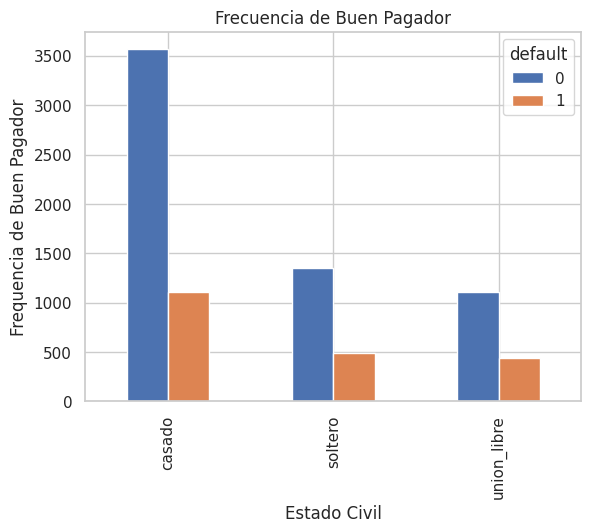

In [ ]:
%matplotlib inline
pd.crosstab(data.estadocivil,data.default).plot(kind='bar')
plt.title('Frecuencia de Buen Pagador')
plt.xlabel('Estado Civil')
plt.ylabel('Frequencia de Buen Pagador')
plt.savefig('approval_freq')

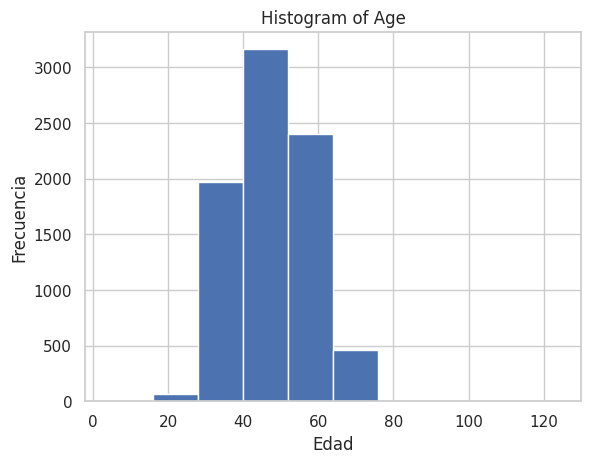

In [ ]:
data.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.savefig('hist_age')

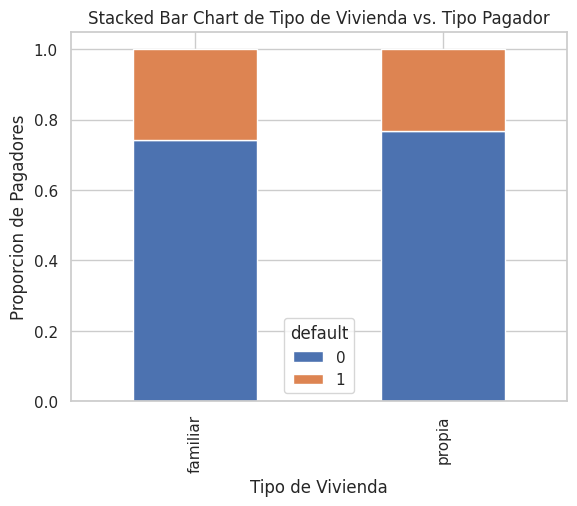

In [ ]:
table=pd.crosstab(data.viviendatipo,data.default)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart de Tipo de Vivienda vs. Tipo Pagador')
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Proporcion de Pagadores')
plt.savefig('vivienda_prop_stack')

In [ ]:
data_encoded = pd.get_dummies(data, columns=['viviendatipo', 'estadocivil'], dtype=int)
print(data_encoded)

      cliente  oficina  ingresos  viviendavalor  lineasdevale  montosdelineas  \
0     1000181       10   11099.0       700000.0             1         42000.0   
1     1000276       10   31000.0       250000.0             1         55000.0   
2     1000329       10   46000.0       200000.0             0             0.0   
3     1000885       10    4862.0       350000.0             0             0.0   
4     1000903       10   22000.0        55000.0             2         91476.0   
...       ...      ...       ...            ...           ...             ...   
8139   823932        8   24000.0       580000.0             0             0.0   
8140   824009        8   18400.0       800000.0             5        363453.0   
8141   824025        8   21176.0       800000.0             1         84337.0   
8142   824043        8   10404.0       800000.0             4        169502.0   
8143   824072        8   23862.0      1500000.0             0             0.0   

      dependientes  fechana

In [ ]:
data_encoded.columns.values

array(['cliente', 'oficina', 'ingresos', 'viviendavalor', 'lineasdevale',
       'montosdelineas', 'dependientes', 'fechanacimiento', 'default',
       'Age', 'viviendatipo_familiar', 'viviendatipo_propia',
       'estadocivil_casado', 'estadocivil_soltero',
       'estadocivil_union_libre'], dtype=object)

In [ ]:
new_data = data_encoded.drop(columns=['cliente', 'fechanacimiento'])
new_data.head()

,oficina,ingresos,viviendavalor,lineasdevale,montosdelineas,dependientes,default,Age,viviendatipo_familiar,viviendatipo_propia,estadocivil_casado,estadocivil_soltero,estadocivil_union_libre
0,10,11099.0,700000.0,1,42000.0,2,1,9,0,1,0,1,0
1,10,31000.0,250000.0,1,55000.0,1,0,54,1,0,1,0,0
2,10,46000.0,200000.0,0,0.0,2,0,51,1,0,1,0,0
3,10,4862.0,350000.0,0,0.0,2,1,44,0,1,1,0,0
4,10,22000.0,55000.0,2,91476.0,3,1,48,1,0,1,0,0


In [ ]:
y = new_data.pop('default')
X = new_data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)
print('tamaño de entrenamiento: ', X_train.shape)
print('tamaño de entrenamiento: ', y_train.shape)
print('tamaño de prueba: ', X_test.shape)
print('tamaño de prueba: ', y_test.shape)

tamaño de entrenamiento:  (6453, 12)
tamaño de entrenamiento:  (6453,)
tamaño de prueba:  (1614, 12)
tamaño de prueba:  (1614,)


In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
y_train.value_counts(normalize=True)

default
0    0.751588
1    0.248412
Name: proportion, dtype: float64

In [ ]:
lr_basemodel = LogisticRegression(class_weight={0:0.1, 1:0.9})
lr_basemodel.fit(X_train, y_train)
y_pred_basemodel = lr_basemodel.predict(X_test)

In [ ]:
print("f1 score for base model is : " , f1_score(y_test,y_pred_basemodel))

f1 score for base model is :  0.42322834645669294


In [ ]:
lr=LogisticRegression()
weights = np.linspace(0.0,0.99,500)
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15000 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErr

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                                          {0: 0.04959919839679359,
                                           1: 0.9504008016032064},
                                          {0: 0.05158316633266533,
                                           1: 0.9484168336673346},
                                          {0: 0.05356713426853708,
                                           1: 0.9464328657314629},
                                          {0: 0.055551102204408814,
                                           1: 0.9444488977955912},
                                          {0: 0.05753507014028056,
                                           1: 0.9424649298597194}, ...],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1')

In [ ]:
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.42021588645818636
Best hyperparameters:  {'C': 10, 'class_weight': {0: 0.2003807615230461, 1: 0.7996192384769539}, 'penalty': 'l2'}


In [ ]:
lr2 = LogisticRegression(class_weight={0: 0.20, 1: 0.80}, C=10, penalty='l2')
lr2.fit(X_train, y_train)

LogisticRegression(C=10, class_weight={0: 0.2, 1: 0.8})

In [ ]:
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]
y_pred_test = lr2.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :nn",cm)
print("n")
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred_prob_test))
print("precision score  test dataset:  t", precision_score(y_test,y_pred_test))
print("Recall score  test dataset:  t", recall_score(y_test,y_pred_test))
print("f1 score  test dataset :  t", f1_score(y_test,y_pred_test))

confusion Matrix is :nn [[311 872]
 [ 82 349]]
n
ROC-AUC score  test dataset:  t 0.5665861891098372
precision score  test dataset:  t 0.2858312858312858
Recall score  test dataset:  t 0.8097447795823666
f1 score  test dataset :  t 0.42251815980629537


Text(0.5, 427.9555555555555, 'Predicted label')

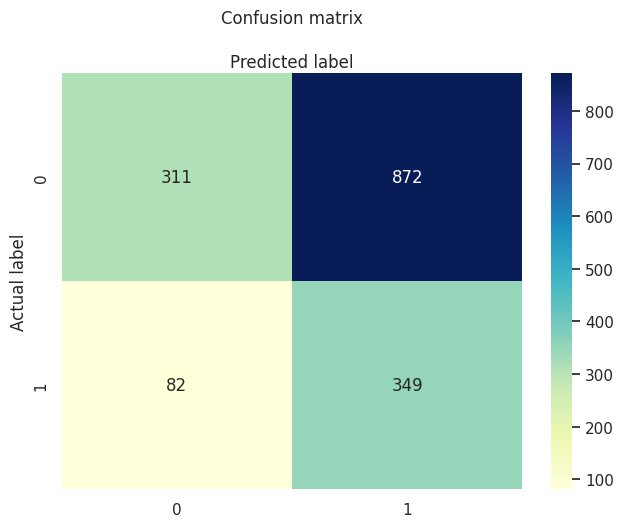

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
target_names = ['buen pagador', 'mal pagador']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

buen pagador       0.79      0.26      0.39      1183
 mal pagador       0.29      0.81      0.42       431

    accuracy                           0.41      1614
   macro avg       0.54      0.54      0.41      1614
weighted avg       0.66      0.41      0.40      1614



El modelo tiene una tasa de clasificación con precisión del 41%. Se desempeña mejor en la identificación de los malos pagadores ya que correctamente identificó el 81% de los malos pagadores mientras que en los buenos pagadores solo fue un 26%

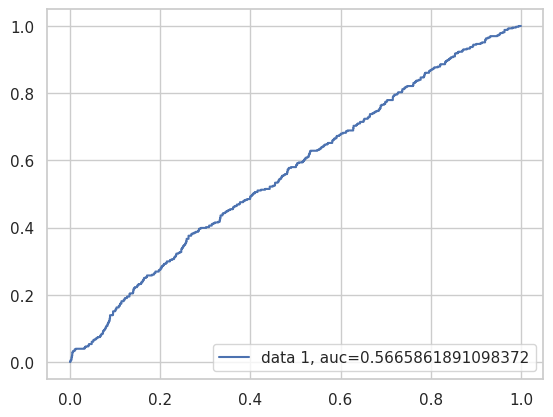

In [ ]:
y_pred_proba = lr2.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

El puntaje AUC es una métrica única que representa el rendimiento general de un modelo de clasificación binaria basada en el área bajo su curva ROC.La gráfica ROC ilustra el equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos en varios umbrales de clasificación. Cuando 0,5 < AUC < 1 existe una alta probabilidad de que el clasificador pueda distinguir los valores de clase positivos de los negativos. Esto es así porque el clasificador es capaz de detectar más números de Verdaderos positivos y Verdaderos negativos que de Falsos negativos y Falsos positivos. En este caso el Score dado de 0.5666 indica que es ligeramente mejor que el azar, sin embargo, sugiere que el rendimiento predictivo del modelo es modesto.

In [ ]:
gini = 2*auc-1
ks_statistic = max(tpr-fpr)
ks_threshold = thresholds[(tpr-fpr).argmax()]
print(f'KS statistic: ', ks_statistic)
print('Gini coefficient: ', gini)

KS statistic:  0.11297911440692093
Gini coefficient:  0.13317237821967431


El Kolmogorov-Smirnov (KS) score es una forma de comparar la suma acumulada de las clases positivas y negativas. Mide la diferencia máxima entre los dos en el rango de probabilidades predichas. Una puntuación de 0.11298 sugiere que existe una diferencia moderada entre las distribuciones acumuladas de las clases positivas y negativas en las predicciones del modelo.

Mientras que el coeficiente de Gini evalúa exhaustivamente el poder discriminatorio de un modelo cuantificando la desigualdad en las probabilidades de incumplimiento previstas.

Un coeficiente de 0.1332 indica que el poder predictivo del modelo es limitado, con un nivel relativamente bajo de discriminación entre resultados positivos y negativos.

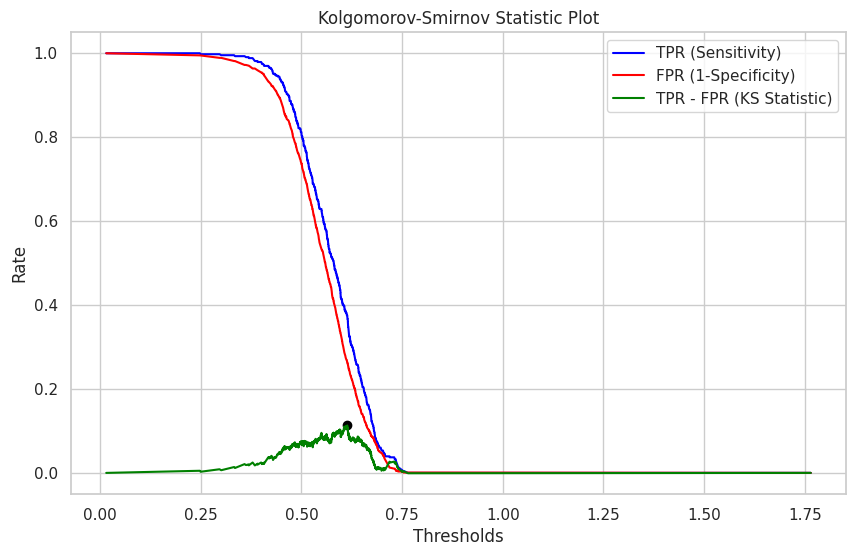

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(thresholds, tpr,label='TPR (Sensitivity)', color='blue')
plt.plot(thresholds, fpr, label='FPR (1-Specificity)', color='red')
plt.plot(thresholds, tpr - fpr, label='TPR - FPR (KS Statistic)', color='green')
plt.scatter([ks_threshold], [ks_statistic], color='black')
plt.title('Kolgomorov-Smirnov Statistic Plot')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.legend()
plt.show()

In [ ]:
df_results = pd.DataFrame({'Actual': y_test, 'Score': y_pred_proba})
df_results = df_results.sort_values(by='Score', ascending=False)
df_results['Grupo'] = pd.qcut(df_results['Score'], 10, labels=False)
total = len(df_results) / df_results.groupby('Grupo').size()
min_score = df_results.groupby('Grupo')['Score'].min()
max_score = df_results.groupby('Grupo')['Score'].max()
dif = max_score - min_score
df_results['Incum'] = df_results.apply(lambda row: 1 if row['Actual'] == 1 else 0, axis=1)
incum = df_results.groupby('Grupo')['Incum'].sum()
tasa_incum = (incum / df_results.groupby('Grupo')['Incum'].count()) * 100
tasa_incum_acumulado = tasa_incum.cumsum()
non_incum = df_results.groupby('Grupo').size() - incum
odds = non_incum / incum
prom_score = df_results.groupby('Grupo')['Score'].mean()
inverse_prom_score = 1 - prom_score
gains_table = pd.DataFrame({
    'Min_Score': min_score.values,
    'Max_Score': max_score.values,
    'Dif': dif.values,
    'total': total,
    'por_total': total * 100,
    'Incum': incum.values,
    'Tasa_incum': tasa_incum.values,
    'Tasa_incum_acumulado': tasa_incum_acumulado.values,
    'Odds': odds.values,
    'Prom_Score': prom_score.values,
    '1-Prom_Score': inverse_prom_score.values
})

print(gains_table)

       Min_Score  Max_Score       Dif      total    por_total  Incum  \
Grupo                                                                  
0       0.015301   0.449175  0.433874   9.962963   996.296296     28   
1       0.449400   0.485763  0.036363  10.024845  1002.484472     38   
2       0.485840   0.514322  0.028482  10.024845  1002.484472     43   
3       0.514348   0.538521  0.024173   9.962963   996.296296     41   
4       0.538584   0.563988  0.025404  10.024845  1002.484472     40   
5       0.564028   0.587694  0.023666  10.024845  1002.484472     39   
6       0.587738   0.611160  0.023422   9.962963   996.296296     38   
7       0.611189   0.638118  0.026929  10.024845  1002.484472     53   
8       0.638139   0.672862  0.034723  10.024845  1002.484472     54   
9       0.672906   0.764733  0.091826   9.962963   996.296296     57   

       Tasa_incum  Tasa_incum_acumulado      Odds  Prom_Score  1-Prom_Score  
Grupo                                                    

**tasa_incum_acumulado:** Indica cómo aumenta la tasa de incumplimiento acumulada a medida que te desplazas desde el grupo con las probabilidades predichas más altas (decil superior) hasta el grupo con las probabilidades predichas más bajas (decil inferior), un valor más alto en esta columna indica que una proporción mayor de incumplimientos ocurren más temprano en el orden de las probabilidades predichas.

**Odds:** Un valor de odds más alto indica que hay más ocurrencias de ser buen pagador en relación con las ocurrencias de mal pagador dentro del grupo

**Prom_score:** Proporciona una medida promedio de la probabilidad de ser mal pagador para las observaciones dentro de cada grupo.

In [ ]:
threshold_score = 0.4
cutting_point = gains_table.iloc[(gains_table['Prom_Score'] - threshold_score).abs().argsort()[:1]]
print("El punto de corte para aprobar o rechazar a un cliente en base al score: ", cutting_point['Prom_Score'].values[0])

El punto de corte para aprobar o rechazar a un cliente en base al score:  0.38823929336773494
